### THE SPARKS FOUNDATION

### Data Science & Business Analytics Internship May-2021

### Author : Paritosh Raikar

# Prediction using Supervised Machine Learning(ML).

### Objective : To predict the percentage score of a student based on their hours of study .

### Method : Simple Linear Regression

## Step 1 : Importing all required libraries and data file.

In [1]:
#importing all required libraries
import numpy as np                          #All Mathematical functions
import pandas as pd                        #Analysis Purpose
import matplotlib.pyplot as plt             #Plotting Library
%matplotlib inline


In [22]:
#reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Data retrieved succesfully")


Data retrieved succesfully


In [23]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Cheking Total number of observations.

In [4]:
data.shape

(25, 2)

#### Cheking any null value is present in our data or not.

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Cheking basic Statistics of our data.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: visualising the data

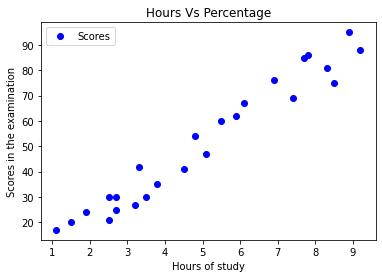

In [7]:
#plotting the graph between two variables
data.plot(x='Hours' , y='Scores' , c='b' , style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours of study')
plt.ylabel('Scores in the examination')
plt.show()

##### from the above graph,it is easy to say that there is positive linear relationship between hours of study and scores in the examination

## Step 3 : Differentiate between  test data and train data .

In [8]:
x = data.iloc[: , 0:1].values      #iloc is excluding function 
y = data.iloc[: , 1].values  

Here we split the data into test data and train data using Scikit-Learn's library . train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets. 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Step 4 : Training the model.

In [10]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train , y_train)
print("Training Completed")

Training Completed


In [11]:
b1 = lr.coef_
print(b1)

[9.78856669]


In [12]:
b0 = lr.intercept_
print(b0)

2.370815382341881


In [13]:
#checking the accuracy for the trained data
lr.score(x_train, y_train)

0.9484997422695115

In [14]:
#checking accuracy for the tested data
lr.score(x_test, y_test)

0.9568211104435257

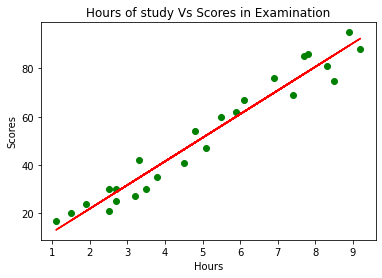

In [15]:
#plotting the regression line
line = lr.coef_*x+lr.intercept_
#plot for tested data
plt.title("Hours of study Vs Scores in Examination")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x, y, c='g')
plt.plot(x, line, c='r')
plt.show()

### Step 5: Using the model for prediction.

In [16]:
# Testing data
y_pred = lr.predict(x_test) #predict scores by our fitted model.
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [17]:
#comapring fitted or predicated and actual values(scores)
ActualVsPred = pd.DataFrame({'Actual' : y_test , 'Predict' : y_pred})
ActualVsPred

,Actual,Predict
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

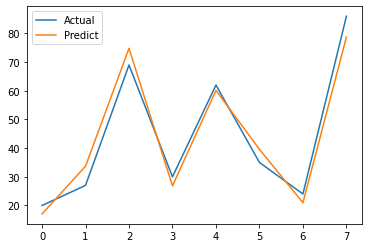

In [24]:
#comparison by grphical method
ActualVsPred.plot(kind='line')

#### Predicting with certain choosen value

In [19]:
# Predicated values of score if student study 9.25 hr/day using fitted regression model.
hours = 9.25
p = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicated Score = {}".format(p))

No of Hours = 9.25
Predicated Score = [92.91505723]


### Step 6: Evaluating Model on testing data

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Absolute Error:' ,
      metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error:',
     mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2):',
     r2_score(y_test, y_pred))


Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Coefficient of determination (R^2): 0.9568211104435257


### So our linear regression model seems a very good fit to the data as it is has coefficient of determination of 0.96; i,e. 96% of the variability in y(percentage score) has been explained by x(hours of study).

### Thank You .